In [11]:
from sklearn.datasets import (
    load_iris,
    load_digits,
    load_wine,
    load_breast_cancer,
    load_diabetes,
)

loaders = {
    "iris": load_iris,
    "digits": load_digits,
    "wine": load_wine,
    "breast_cancer": load_breast_cancer,
    "diabetes": load_diabetes,
}

In [12]:
dataset = load_iris()
X, y = dataset["data"], dataset["target"]

In [13]:
# from decision_tree.numpy import DecisionTreeClassifier
from decision_tree.jax import DecisionTreeClassifier

model = DecisionTreeClassifier(
    max_depth=3,
    min_samples=1,
    # feature_names=dataset["feature_names"],
    # target_names=dataset['target_names'],
)

In [14]:
from sklearn.model_selection import KFold
import numpy as np

cv_scores = []
for train_idx, test_idx in KFold(n_splits=5, shuffle=True).split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    model.fit(X_train, y_train)
    cv_scores.append(model.score(X_test, y_test))
print(np.mean(cv_scores))

0.96000004


/Users/johanleduc/workspace/algorithms/decision_trees/decision_tree/jax/decision_tree.py:179: UserWarning: Explicitly requested dtype int requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return self.root.predict(X, mask).astype("int")


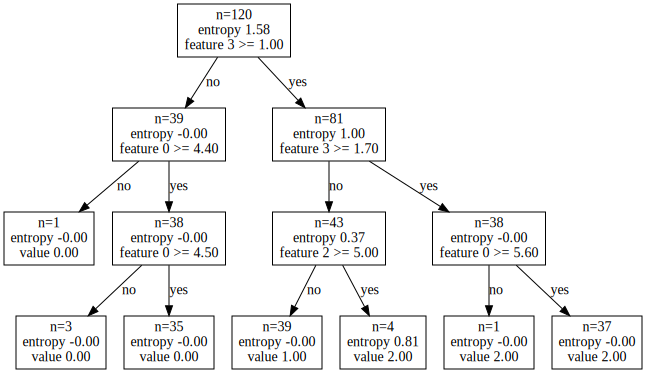

In [15]:
from graphviz import Source
from decision_tree.viz import show

Source(show(model))